# Procesamiento Digital de Señales <img src="./logo_UTN.svg" align="right" width="150"/>
## Alumno: Emanuel Olay
### Tarea Semanal: 4
### Consigna:
En esta tarea semanal retomamos la consigna de la tarea anterior, donde simulamos el bloque de cuantización de un ADC de B bits en un rango de  ±VF Volts. Ahora vamos a completar la simulación del ADC incluyendo la capacidad de muestrear a fs Hertz.

Para ello se simulará el comportamiento del dispositivo al digitalizar una senoidal contaminada con un nivel predeterminado de ruido. Comenzaremos describiendo los parámetros a ajustar de la senoidal:

frecuencia $f_0$ arbitraria, por ejemplo $f_0=f_S/N=Δf$ 
energía normalizada, es decir energía (o varianza) unitaria
Con respecto a los parámetros de la secuencia de ruido, diremos que:

será de carácter aditivo, es decir la señal que entra al ADC será $s_R=s+n$. Siendo n la secuencia que simula la interferencia, y s la senoidal descrita anteriormente.
La potencia del ruido será Pn=kn.Pq W siendo el factor k una escala para la potencia del ruido de cuantización $Pq=q^2/12$.
finalmente, n será incorrelado y Gaussiano.
El ADC que deseamos simular trabajará a una frecuencia de muestreo $f_S=1000 Hz$ y tendrá un rango analógico de $±V_F=2 Volts$.

Se pide:

a) Generar el siguiente resultado producto de la experimentación. B = 4 bits, kn=1.

In [13]:
#%% Configuración e inicio de la simulación
#######################################################################################################################
 
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from scipy.fft import fft
%matplotlib inline
# Datos generales de la simulación
fs = 1000.0 # frecuencia de muestreo (Hz)
N = 1000   # cantidad de muestras
 
# cantidad de veces más densa que se supone la grilla temporal para tiempo "continuo"
over_sampling = 4
N_os = N*over_sampling
 
# Datos del ADC
B = 4 # bits
Vf = 2 # Volts
q = Vf/2**B # Volts
 
# datos del ruido
kn = 1
pot_ruido = q**2/12 * kn # Watts (potencia de la señal 1 W)
 
ts = 1/fs # tiempo de muestreo
df = fs/N # resolución espectral

In [14]:
#%% Acá arranca la simulación
 #%% Cuentas correspondientes al seno ideal
t = np.linspace(0, 1, N_os,endpoint=False)
#senoidal de amplitud 1 y 1 hz de frecuencia
amp=1 #amplitud en volts
freq=1 #fs/N #frecuencia en Hz
fase=0 #radianes
##Armo el seno ideal
analog_sig=amp*np.sin(2 * np.pi * freq * t + fase)
##calculo su potencia en watts
seno_ideal_watts = analog_sig ** 2
##Calculo potencia en dB
seno_ideal_db = 10 * np.log10(seno_ideal_watts)
    #%% Cuentas correspondientes al ruido
##Signal to Noise ratio en dB
SNR_db = 20
##Calculo la media
seno_ideal_avg_watts = np.mean(seno_ideal_watts)
seno_ideal_avg_db = 10 * np.log10(seno_ideal_avg_watts)
##Calculo la potencia del ruido
noise_avg_db = seno_ideal_avg_db - SNR_db
noise_avg_watts = 10 ** (noise_avg_db / 10)
##Armo el ruido con la potencia calculada
noise = np.random.normal(0, np.sqrt(noise_avg_watts), len(seno_ideal_watts))
    #%%Le sumo el ruido al seno ideal
sr = analog_sig + noise

    #%%Cuantizacion
srq=np.round(sr/q)*q
    #%%Calculo de la Densidad espectral de potencia
DEP_srq=np.abs(fft(srq))**2
DEP_sr=np.abs(fft(sr))**2
DEP_analog_sig=np.abs(fft(analog_sig))**2
Noise_q=sr-srq
Noise_q_mean=np.mean(Noise_q)
Noise_mean=np.mean(noise)
#10* np.log10(2* nNn_mean)

<ipython-input-14-517b35666a42>:13: RuntimeWarning: divide by zero encountered in log10
  seno_ideal_db = 10 * np.log10(seno_ideal_watts)


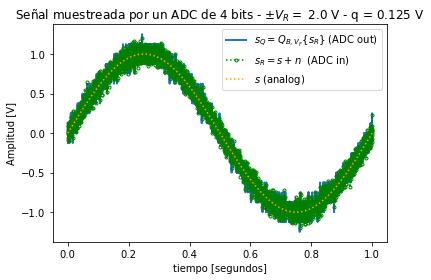

Text(0.5, 1.0, 'Ruido de cuantización para 4 bits - $\\pm V_R= $ 2.0 V - q = 0.125 V')

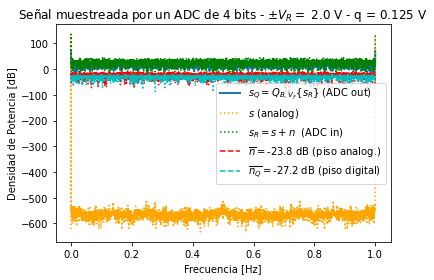

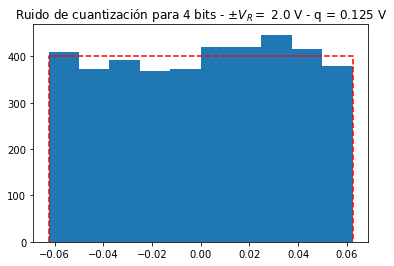

In [15]:
#%% Presentación gráfica de los resultados
plt.close('all')
 
plt.figure(1)
plt.plot(t, srq, lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\} $ (ADC out)')
plt.plot(t, sr, linestyle=':', color='green',marker='o', markersize=3, markerfacecolor='none', markeredgecolor='green', fillstyle='none', label='$ s_R = s + n $  (ADC in)')
plt.plot(t, analog_sig, color='orange', ls='dotted', label='$ s $ (analog)')
 
plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
axes_hdl = plt.gca()
axes_hdl.legend()
plt.show()

####################################################
 
plt.figure(2)
plt.plot( t, 10* np.log10(2*DEP_srq), lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\} $ (ADC out)' )
plt.plot( t, 10* np.log10(2*DEP_analog_sig**2), color='orange', ls='dotted', label='$ s $ (analog)' )
plt.plot( t, 10* np.log10(2*DEP_sr**2), ':g', label='$ s_R = s + n $  (ADC in)' )
plt.plot( t, 10* np.log10(2*noise**2), ':r')
plt.plot( t, 10* np.log10(2*Noise_q**2), ':c')
plt.plot( np.array([ 0, 1 ]), 10* np.log10(2* np.array([Noise_mean, Noise_mean]) ), '--r', label= '$ \overline{n} = $' + '{:3.1f} dB (piso analog.)'.format(10* np.log10(2* Noise_mean)) )
plt.plot( np.array([ 0, 1 ]), 10* np.log10(2* np.array([Noise_q_mean, Noise_q_mean]) ), '--c', label='$ \overline{n_Q} = $' + '{:3.1f} dB (piso digital)'.format(10* np.log10(2* Noise_q_mean)) )

plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
axes_hdl = plt.gca()
axes_hdl.legend()

##################################################

plt.figure(3)
bins = 10
plt.hist(Noise_q, bins=bins)
#Aca agregue el 4* ya que no hice mi array de tiempo "discreto" que es 4 veces menor que t
plt.plot( np.array([-q/2, -q/2, q/2, q/2]), np.array([0, 4*N/bins, 4*N/bins, 0]), '--r' )
plt.title( 'Ruido de cuantización para {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q))